In [56]:
import numpy as np
import pandas as pd

In [57]:
# load Data
data = pd.read_excel('BA_AirlineReviews_CL_excel.xlsx')
display(data.head())
data.describe()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


,id,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [58]:
# melihat tipe data pada setiap kolom
print(data.dtypes)

id                                int64
Satisfaction                     object
ReviewHeader                     object
Name                             object
Datetime                         object
VerifiedReview                     bool
ReviewBody                       object
TypeOfTraveller                  object
SeatType                         object
Route                            object
DateFlown                datetime64[ns]
SeatComfort                     float64
CabinStaffService               float64
GroundService                   float64
ValueForMoney                   float64
Recommended                      object
Aircraft                         object
Food&Beverages                  float64
InflightEntertainment           float64
Wifi&Connectivity               float64
dtype: object


In [59]:
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

== Preposesing Data ==

In [60]:
# isi menggunakan missing value dengan KNN imputer pada kolom 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment'
from sklearn.impute import KNNImputer

# Definisikan kolom yang akan diimputasi
columns_to_impute = ['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment']

# Inisialisasi KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Lakukan imputasi KNN pada kolom yang ditentukan
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Pembulatan nilai imputasi ke angka terdekat antara 1 dan 5
data[columns_to_impute] = np.round(data[columns_to_impute]).astype(int)

# Pastikan nilai berada dalam rentang 1 hingga 5
data[columns_to_impute] = np.clip(data[columns_to_impute], 1, 5)

# Verifikasi apakah missing value sudah diimputasi dan tidak ada yang tersisa
print(data.isnull().sum())


id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity        3092
dtype: int64


In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# 1. Periksa jumlah missing value pada kolom 'DateFlown'
print("Missing values in 'DateFlown':", data['DateFlown'].isnull().sum())

# 2. Ekstrak Month dan Year dari 'DateFlown'
data['DateFlown_m'] = data['DateFlown'].dt.month
data['DateFlown_y'] = data['DateFlown'].dt.year

# 3. Periksa missing value setelah ekstraksi
print("Missing values after extracting Month and Year:\n", data[['DateFlown_m', 'DateFlown_y']].isnull().sum())

# 4. Terapkan imputasi KNN jika masih ada missing value pada 'DateFlown_m' dan 'DateFlown_y'
imputer = KNNImputer(n_neighbors=5)
data[['DateFlown_m', 'DateFlown_y']] = imputer.fit_transform(data[['DateFlown_m', 'DateFlown_y']])

# 5. Verifikasi apakah imputasi sudah berhasil
print("Missing values after KNN Imputation:\n", data[['DateFlown_m', 'DateFlown_y']].isnull().sum())

# 6. Pembulatan dan validasi rentang untuk Month (1-12) dan Year (dalam rentang tahun yang valid)
data['DateFlown_m'] = np.clip(np.round(data['DateFlown_m']).astype(int), 1, 12)

# Pastikan 'DateFlown_y' berada dalam rentang tahun yang valid
data['DateFlown_y'] = np.clip(np.round(data['DateFlown_y']).astype(int), data['DateFlown_y'].min(), data['DateFlown_y'].max())

# 7. Buat mapping ordinal untuk bulan (DateFlown_m) dengan penyesuaian 0.1
# Januari = 0.1, Februari = 0.2, dst.
month_mapping = {month: (month / 10) for month in range(1, 13)}  # Menetapkan bulan Januari = 0.1, dst.
data['DateFlown_m'] = data['DateFlown_m'].map(month_mapping)

# 8. Buat mapping ordinal untuk tahun (DateFlown_y) dengan penyesuaian 0.1
# Menetapkan tahun pertama yang ditemukan sebagai 0.1, dan seterusnya.
unique_years = sorted(data['DateFlown_y'].unique())
year_mapping = {year: ((year - unique_years[0]) * 0.1 + 0.1) for year in unique_years}  # Menetapkan tahun pertama sebagai 0.1
data['DateFlown_y'] = data['DateFlown_y'].map(year_mapping)

# 9. Verifikasi hasil setelah pembulatan dan validasi
print("Unique values in 'DateFlown_m' and 'DateFlown_y' after rounding and encoding:\n", data[['DateFlown_m', 'DateFlown_y']].value_counts())

# 10. Hapus kolom 'DateFlown' setelah ekstraksi dan imputasi
data.drop(columns=['DateFlown'], inplace=True)

# 11. Pastikan kolom 'DateFlown_m' dan 'DateFlown_y' dalam format numerik sebelum encoding
data[['DateFlown_m', 'DateFlown_y']] = data[['DateFlown_m', 'DateFlown_y']].astype(float)

# 12. Inisialisasi OrdinalEncoder dan Terapkan Ordinal Encoding pada kolom 'DateFlown_m' dan 'DateFlown_y'
ordinal_encoder = OrdinalEncoder()

# Terapkan encoding ordinal
data[['DateFlown_m', 'DateFlown_y']] = ordinal_encoder.fit_transform(data[['DateFlown_m', 'DateFlown_y']])

# 13. Ubah tipe data kolom 'DateFlown_m' dan 'DateFlown_y' menjadi integer
data[['DateFlown_m', 'DateFlown_y']] = data[['DateFlown_m', 'DateFlown_y']].astype(int)

# 14. Verifikasi hasil encoding
print("Encoded values in 'DateFlown_m' and 'DateFlown_y':")
print(data[['DateFlown_m', 'DateFlown_y']].head())

# 15. Periksa jumlah missing value setelah semua langkah
print("Missing values after all steps:\n", data.isnull().sum())

# 16. Periksa jumlah unique value pada kolom 'DateFlown'
print("Number of unique values in 'DateFlown_m':", data['DateFlown_m'].nunique())
print("Number of unique values in 'DateFlown_y':", data['DateFlown_y'].nunique())

# Tampilkan unique value pada kolom 'DateFlown'
print("Unique values in 'DateFlown_m':", data['DateFlown_m'].unique())
print("Unique values in 'DateFlown_y':", data['DateFlown_y'].unique())

Missing values in 'DateFlown': 778
Missing values after extracting Month and Year:
 DateFlown_m    778
DateFlown_y    778
dtype: int64
Missing values after KNN Imputation:
 DateFlown_m    0
DateFlown_y    0
dtype: int64
Unique values in 'DateFlown_m' and 'DateFlown_y' after rounding and encoding:
 DateFlown_m  DateFlown_y
0.7          0.5            809
0.8          0.2             83
0.9          0.2             78
1.1          0.2             66
0.4          0.4             65
                           ... 
0.2          0.8              2
1.0          0.1              1
0.8          0.1              1
0.7          0.1              1
0.6          0.7              1
Length: 112, dtype: int64
Encoded values in 'DateFlown_m' and 'DateFlown_y':
   DateFlown_m  DateFlown_y
0           10            9
1           10            9
2           10            9
3           11            8
4           10            9
Missing values after all steps:
 id                          0
Satisfaction    

In [62]:
# menangani missing value pada kolom 'TypeOfTraveller' menggunakan nilai acak dari kolom tersebut
data['TypeOfTraveller'].fillna(data['TypeOfTraveller'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'TypeOfTraveller'
print(data['TypeOfTraveller'].isnull().sum())
data['TypeOfTraveller'].describe()

0


count               3701
unique                 4
top       Couple Leisure
freq                1771
Name: TypeOfTraveller, dtype: object

In [63]:
# menangani missing value pada kolom 'SeatType' nilai acak dari kolom tersebut
data['SeatType'].fillna(data['SeatType'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'SeatType'
print(data['SeatType'].isnull().sum())
data['SeatType'].describe()

0


count              3701
unique                4
top       Economy Class
freq               1927
Name: SeatType, dtype: object

In [64]:
# menangani missing value pada kolom 'Route' nilai acak dari kolom tersebut
data['Route'].fillna(data['Route'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'Route'
print(data['Route'].isnull().sum())
data['Route'].describe()

0


count                 3701
unique                1542
top       London to Malaga
freq                   782
Name: Route, dtype: object

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Pastikan data diinisialisasi dengan benar sebelum menjalankan kode ini

# 1. Encode kolom Aircraft menggunakan LabelEncoder
label_encoder = LabelEncoder()
data['Aircraft_encoded'] = label_encoder.fit_transform(data['Aircraft'].astype(str))

# 2. Pisahkan data berdasarkan missing dan non-missing values di kolom Aircraft
train_data = data[data['Aircraft'].notnull()].copy()
missing_data = data[data['Aircraft'].isnull()].copy()

# 3. Pastikan fitur yang digunakan tidak memiliki missing values
features = ['Route', 'TypeOfTraveller', 'SeatComfort', 'CabinStaffService']
train_data = train_data.dropna(subset=features)
X_train = pd.get_dummies(train_data[features], drop_first=True)
y_train = train_data['Aircraft_encoded']

# 4. Pastikan konsistensi kolom antara data pelatihan dan data dengan missing value
X_missing = pd.get_dummies(missing_data[features], drop_first=True)
X_missing = X_missing.reindex(columns=X_train.columns, fill_value=0)

# 5. Latih model RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Prediksi missing values
missing_data['Aircraft_encoded'] = model.predict(X_missing)

# 7. Masukkan prediksi ke data asli
data.loc[data['Aircraft'].isnull(), 'Aircraft'] = label_encoder.inverse_transform(missing_data['Aircraft_encoded'])

# 8. Hapus kolom encoded yang tidak diperlukan
data.drop(columns=['Aircraft_encoded'], inplace=True)

# 9. Verifikasi hasil
print("Jumlah missing values setelah imputasi:", data['Aircraft'].isnull().sum())

Jumlah missing values setelah imputasi: 0


In [66]:
# menangani missing value pada kolom wifi&connectivity menggunakan random forest regressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Fitur untuk model prediksi
features = ['SeatComfort', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment']

# Split data: rows with missing and without missing values
train_data = data[data['Wifi&Connectivity'].notnull()].copy()
missing_data = data[data['Wifi&Connectivity'].isnull()].copy()

# Pastikan fitur tidak ada NaN
train_data = train_data.dropna(subset=features)

# Fitur dan target untuk model
X_train = train_data[features]
y_train = train_data['Wifi&Connectivity']

# Model untuk memprediksi Wifi&Connectivity
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediksi untuk rows dengan missing value
X_missing = missing_data[features]
predicted_values = model.predict(X_missing)

# Pembulatan nilai prediksi ke angka terdekat antara 1 dan 5
predicted_values_rounded = np.round(predicted_values).astype(int)

# Pastikan nilai prediksi berada di dalam rentang 1 hingga 5
predicted_values_rounded = np.clip(predicted_values_rounded, 1, 5)

# Masukkan kembali prediksi yang sudah dibulatkan ke data asli
data.loc[data['Wifi&Connectivity'].isnull(), 'Wifi&Connectivity'] = predicted_values_rounded

# Verifikasi apakah missing value sudah diimputasi
print(data['Wifi&Connectivity'].isnull().sum())

# Ubah kolom 'Wifi&Connectivity' menjadi tipe data int
data['Wifi&Connectivity'] = data['Wifi&Connectivity'].astype(int)

# Cek unique value pada kolom 'Wifi&Connectivity'
print(data['Wifi&Connectivity'].unique())


0
[1 2 4 3 5]


====== Encode =====


In [67]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# 1. Bersihkan format ordinal hari (hapus 'th', 'st', 'nd', 'rd')
data['Datetime'] = data['Datetime'].str.replace(r'(st|nd|rd|th)', '', regex=True)

# 2. Konversi ke tipe datetime
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

# 3. Periksa apakah ada nilai yang gagal dikonversi
print("Jumlah nilai gagal konversi (NaT):", data['Datetime'].isna().sum())

# 4. Ekstraksi bulan (Datetime_m) dan tahun (Datetime_y)
data['Datetime_m'] = data['Datetime'].dt.month
data['Datetime_y'] = data['Datetime'].dt.year

# Periksa jumlah bulan dan tahun setelah ekstraksi
print("Unique months:", data['Datetime_m'].unique())
print("Unique years:", data['Datetime_y'].unique())

# 5. Tangani missing value dengan KNN jika ada NaN
imputer = KNNImputer(n_neighbors=5)
data[['Datetime_m', 'Datetime_y']] = imputer.fit_transform(data[['Datetime_m', 'Datetime_y']])

# 6. Pastikan bulan berada dalam rentang 1 hingga 12
data['Datetime_m'] = np.clip(np.round(data['Datetime_m']).astype(int), 1, 12)

# 7. Pastikan tahun berada dalam rentang yang valid (2011-2023)
data['Datetime_y'] = np.clip(np.round(data['Datetime_y']).astype(int), 2011, 2023)

# Periksa kembali jumlah bulan dan tahun setelah pemrosesan
print("Unique months after processing:", data['Datetime_m'].unique())
print("Unique years after processing:", data['Datetime_y'].unique())

# 8. Buat mapping ordinal untuk tahun dan bulan
# Menetapkan nilai ordinal untuk tahun dan bulan, tanpa mengganti nilai yang ada
unique_years = sorted(data['Datetime_y'].unique())
unique_months = sorted(data['Datetime_m'].unique())

year_mapping = {year: i for i, year in enumerate(unique_years)}
month_mapping = {month: i for i, month in enumerate(unique_months)}

data['Datetime_y'] = data['Datetime_y'].map(year_mapping)
data['Datetime_m'] = data['Datetime_m'].map(month_mapping)

# 9. Verifikasi hasil
print("Hasil setelah encoding manual:")
print(data)

# Verifikasi apakah hasil sudah konsisten
print("Unique values in Datetime_y and Datetime_m:")
print(data[['Datetime_y', 'Datetime_m']].drop_duplicates())

# 10. Hapus kolom 'Datetime' setelah ekstraksi
data.drop(columns=['Datetime'], inplace=True)


Jumlah nilai gagal konversi (NaT): 295
Unique months: [11. 10.  9. nan  7.  6.  5.  4.  3.  2.  1. 12.]
Unique years: [2023.   nan 2022. 2021. 2020. 2019. 2018. 2017. 2016. 2015. 2014. 2011.]
Unique months after processing: [11 10  9  7  6  5  4  3  2  1 12]
Unique years after processing: [2023 2017 2022 2021 2020 2019 2018 2016 2015 2014 2011]
Hasil setelah encoding manual:
        id       Satisfaction                              ReviewHeader  \
0        0  Very Dissatisfied    "Service level far worse then Ryanair"   
1        1            Neutral  "do not upgrade members based on status"   
2        2       Enthusiastic             "Flight was smooth and quick"   
3        3  Very Dissatisfied             "Absolutely hopeless airline"   
4        4  Very Dissatisfied        "Customer Service is non existent"   
...    ...                ...                                       ...   
3696  3696  Very Dissatisfied           British Airways customer review   
3697  3697           A

In [68]:
# mengganti label satisfaction menjadi numerik (Very Dissatisfied - Dissatisfied - Neutral - Satisfied - Very Satisfied - Delighted - Extremely Satisfied - Enthusiastic - Advocate - Evangelist)
# dengan menggunakan mapping ordinal
satisfaction_mapping = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5,
    'Delighted': 6,
    'Extremely Satisfied': 7,
    'Enthusiastic': 8,
    'Advocate': 9,
    'Evangelist': 10
}

data['Satisfaction'] = data['Satisfaction'].map(satisfaction_mapping)

# Verifikasi hasil mapping
print(data['Satisfaction'].value_counts())

# menampilkan unique value pada kolom 'Satisfaction'
print(data['Satisfaction'].unique())

# menampilkan missing value pada kolom 'Satisfaction'
print(data['Satisfaction'].isnull().sum())

1     867
2     426
3     407
8     370
10    330
7     313
9     310
4     254
5     234
6     190
Name: Satisfaction, dtype: int64
[ 1  3  8  7  2  6  4  5 10  9]
0


In [69]:
# Mengganti Kolom 'VerifiedReview' menjadi numerik dengan menggunakan mapping
# menampilkan unique value pada kolom 'VerifiedReview'
print(data['VerifiedReview'].unique())
# mengganti kolom 'VerifiedReview' menjadi numerik dengan menggunakan mapping
data['VerifiedReview'] = data['VerifiedReview'].astype(int)

# menampilkan unique value pada kolom 'VerifiedReview'
print(data['VerifiedReview'].unique())

[ True False]
[1 0]


In [70]:
# # Mengganti Kolom 'TypeOfTraveller' menjadi numerik dengan menggunakan mapping
# menampilkan unique value pada kolom 'TypeOfTraveller'
print(data['TypeOfTraveller'].unique())
# mengganti kolom 'TypeOfTraveller' menjadi numerik dengan menggunakan mapping
type_of_traveller_mapping = {
	'Solo Leisure': 1,
	'Couple Leisure': 2,
	'Family Leisure': 3,
	'Business': 4,
	'Solo Business': 5,
	'Couple Business': 6,
	'Family Business': 7
}
data['TypeOfTraveller'] = data['TypeOfTraveller'].map(type_of_traveller_mapping)

# menampilkan unique value pada kolom 'TypeOfTraveller'
print(data['TypeOfTraveller'].unique())

['Couple Leisure' 'Business' 'Solo Leisure' 'Family Leisure']
[2 4 1 3]


In [71]:
# Mengganti Kolom 'SeatType' menjadi numerik
# menampilkan unique value pada kolom 'SeatType'
print(data['SeatType'].unique())
# mengganti kolom 'SeatType' menjadi numerik dengan menggunakan mapping
seat_type_mapping = {
    'Business Class': 1,
    'Economy Class': 2,
    'First Class': 3,
    'Premium Economy': 4
}
data['SeatType'] = data['SeatType'].map(seat_type_mapping)

# menampilkan unique value pada kolom 'SeatType'
print(data['SeatType'].unique())

['Economy Class' 'Business Class' 'Premium Economy' 'First Class']
[2 1 4 3]


In [72]:
# Mengganti kolom 'Recommended' yes jadi 1 dan no jadi 0
# menampilkan unique value pada kolom 'Recommended'
print(data['Recommended'].unique())
# mengganti kolom 'Recommended' menjadi numerik dengan menggunakan mapping
recommended_mapping = {
    'yes': 1,
    'no': 0
}
data['Recommended'] = data['Recommended'].map(recommended_mapping)

# menampilkan unique value pada kolom 'Recommended'
print(data['Recommended'].unique())

['no' 'yes']
[0 1]


In [73]:
# Menghaus kolom 'Aircraft' 
data.drop(columns=['Aircraft'], inplace=True)
data.drop(columns=['ReviewHeader'], inplace=True)
data.drop(columns=['Name'], inplace=True)
data.drop(columns=['ReviewBody'], inplace=True)
data.drop(columns=['Route'], inplace=True)

============================================== /// ========================================================

                             id  Satisfaction  VerifiedReview  \
id                     1.000000      0.221774       -0.699034   
Satisfaction           0.221774      1.000000       -0.100908   
VerifiedReview        -0.699034     -0.100908        1.000000   
TypeOfTraveller       -0.061516     -0.166606        0.025258   
SeatType               0.015997     -0.007723       -0.037605   
SeatComfort            0.167726      0.748982       -0.081498   
CabinStaffService      0.138554      0.728147       -0.065849   
GroundService          0.119307      0.740926       -0.062740   
ValueForMoney          0.227626      0.872955       -0.101929   
Recommended            0.196341      0.865059       -0.084015   
Food&Beverages         0.175249      0.765049       -0.057942   
InflightEntertainment  0.056610      0.578537       -0.011254   
Wifi&Connectivity      0.126626      0.695219       -0.041412   
DateFlown_m            0.072413      0.017579       -0.065106   
DateFlown_y           -0.

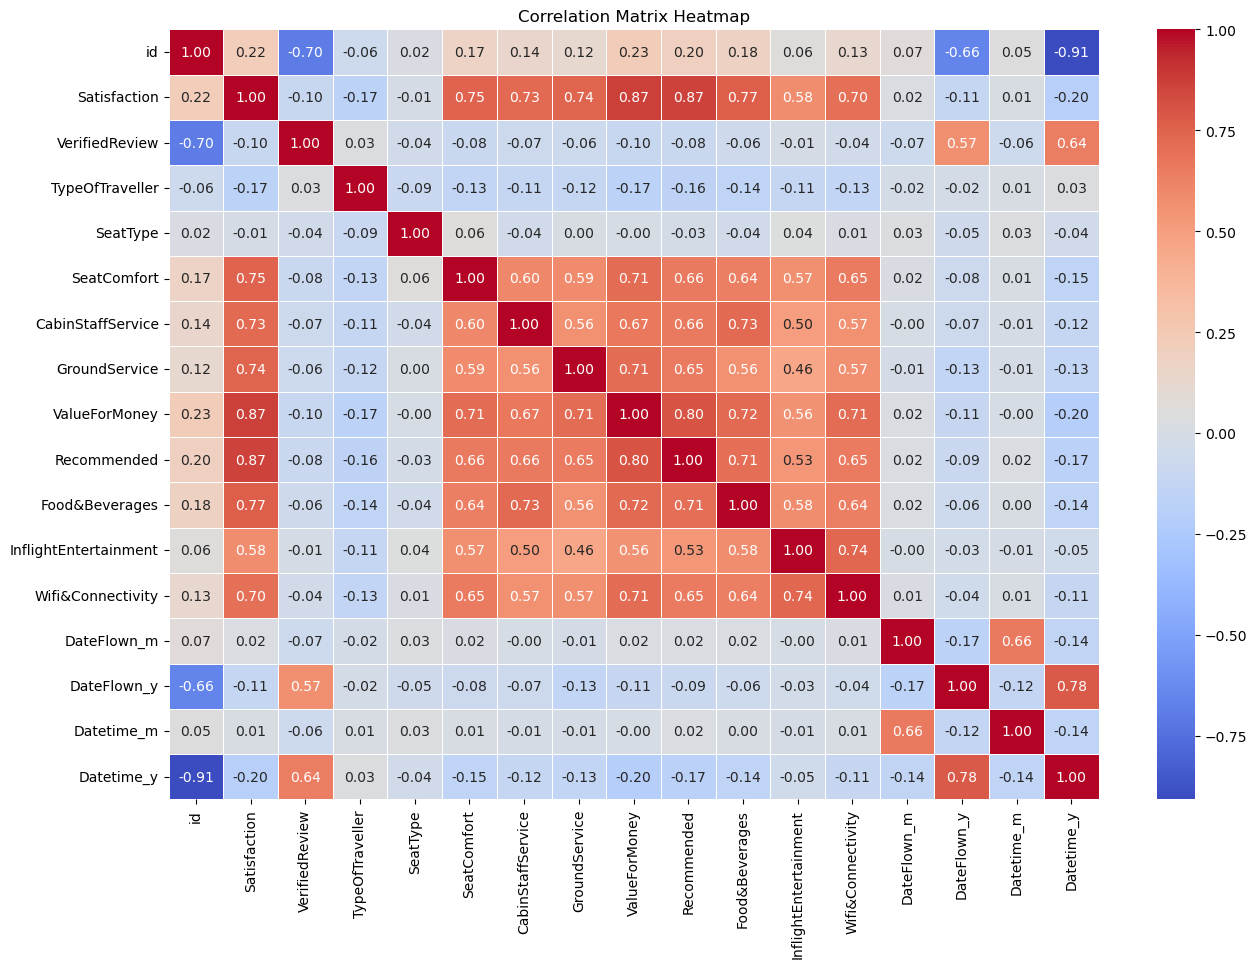

In [74]:
import seaborn as sns

# pengecekan correlation antar kolom sebelum melakukan encoding
correlation = data.corr()
print(correlation)
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [75]:
# print("Number of unique :", data['Aircraft'].nunique())

In [76]:
display(data.head())

,id,Satisfaction,VerifiedReview,TypeOfTraveller,SeatType,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Food&Beverages,InflightEntertainment,Wifi&Connectivity,DateFlown_m,DateFlown_y,Datetime_m,Datetime_y
0,0,1,1,2,2,1,1,1,1,0,1,1,1,10,9,9,10
1,1,3,1,4,2,2,3,1,2,0,1,2,2,10,9,9,10
2,2,8,0,2,1,3,3,4,3,1,4,2,2,10,9,9,10
3,3,1,1,2,2,3,3,1,1,0,3,2,1,11,8,9,10
4,4,1,0,2,2,1,1,1,1,0,1,1,1,10,9,9,10


In [77]:
data.isnull().sum()
data.dtypes

id                       int64
Satisfaction             int64
VerifiedReview           int32
TypeOfTraveller          int64
SeatType                 int64
SeatComfort              int32
CabinStaffService        int32
GroundService            int32
ValueForMoney            int32
Recommended              int64
Food&Beverages           int32
InflightEntertainment    int32
Wifi&Connectivity        int32
DateFlown_m              int32
DateFlown_y              int32
Datetime_m               int64
Datetime_y               int64
dtype: object

In [78]:
# print berapa banyak data satisfaction yang ada
print(data['Satisfaction'].value_counts())

1     867
2     426
3     407
8     370
10    330
7     313
9     310
4     254
5     234
6     190
Name: Satisfaction, dtype: int64


SPLIT DATA

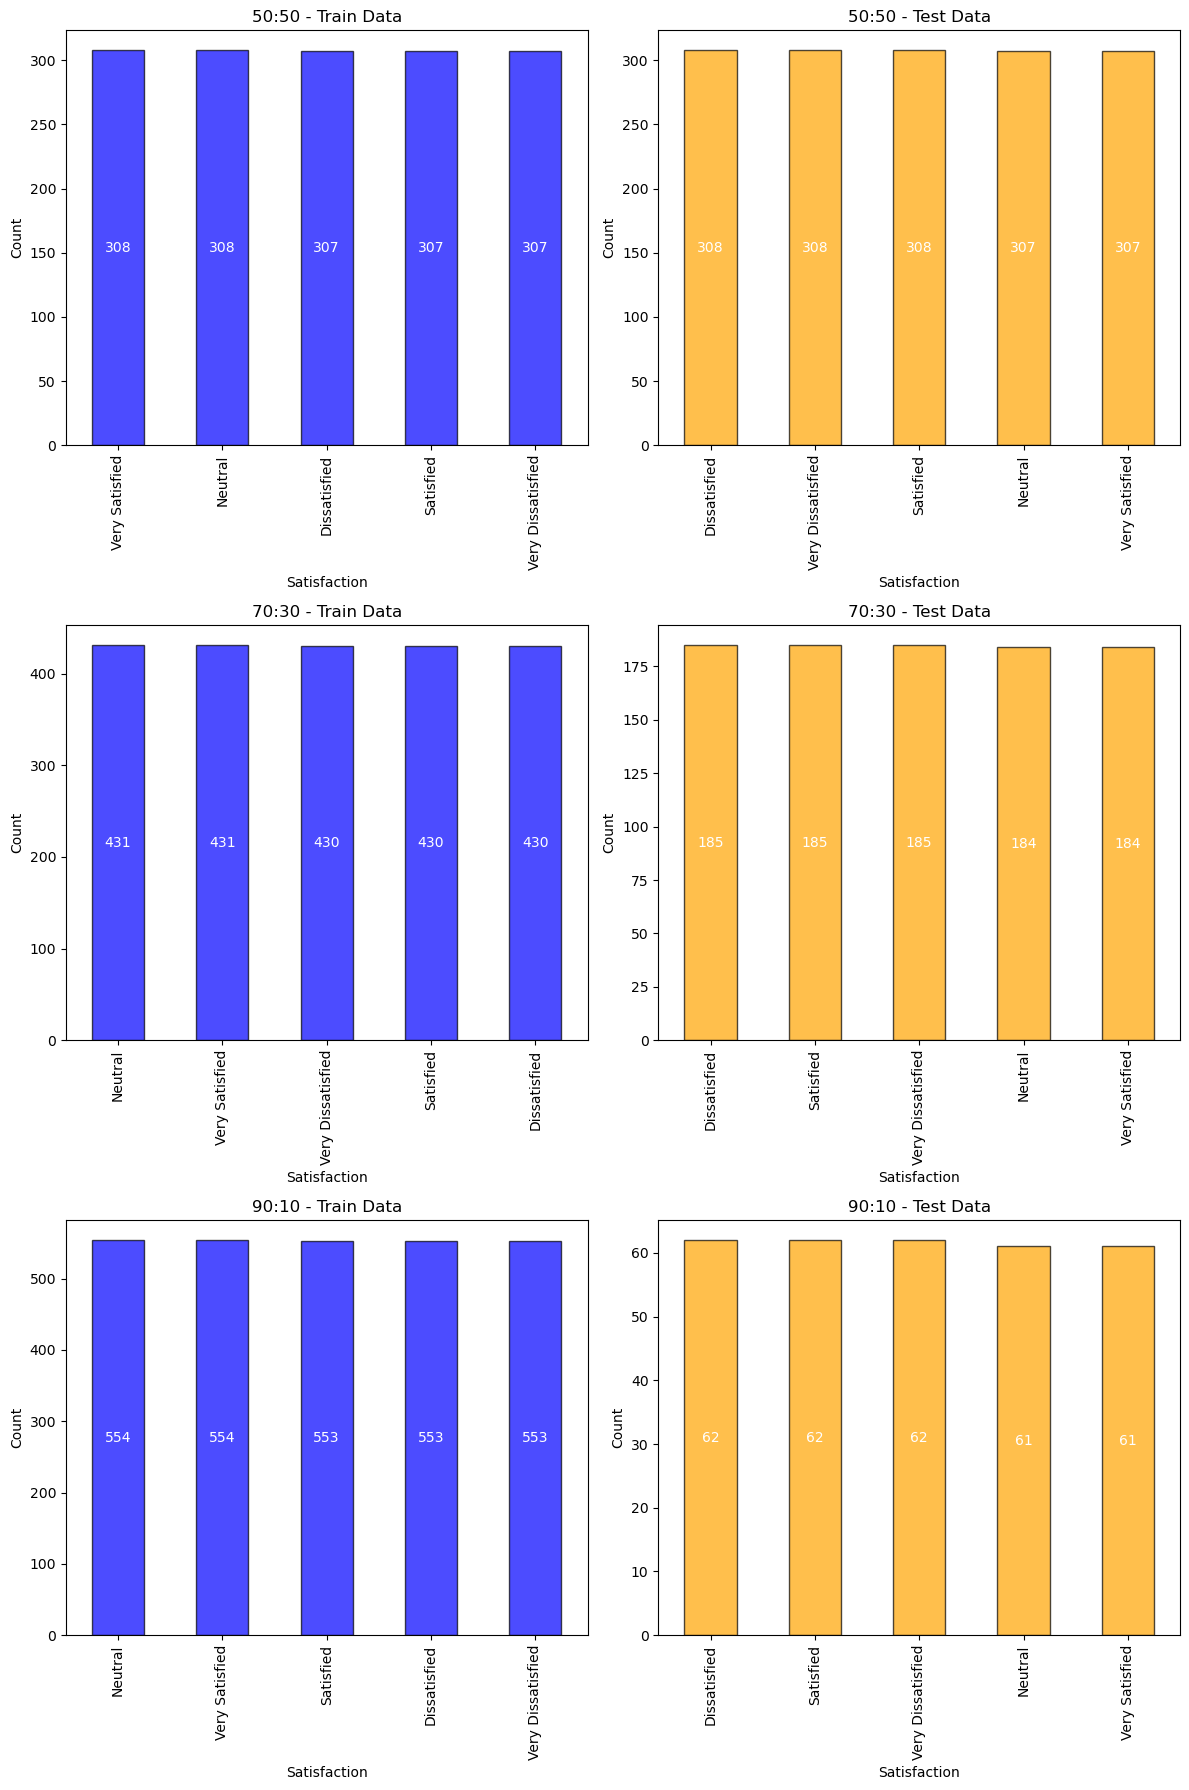

In [79]:
import pandas as pd
import numpy as np

# Membuat dataset dengan 3075 data
n_data_per_class = 615  # Total 3075 / 5 classes
data = pd.DataFrame({
    'Satisfaction': np.repeat(["Very Dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very Satisfied"], n_data_per_class),
    'Recommended': np.random.randint(1, 100, size=3075),
    'ValueForMoney': np.random.randint(1, 100, size=3075),
    'Food&Beverages': np.random.randint(1, 100, size=3075),
    'SeatComfort': np.random.randint(1, 100, size=3075),
    'GroundService': np.random.randint(1, 100, size=3075),
    'CabinStaffService': np.random.randint(1, 100, size=3075),
    'Wifi&Connectivity': np.random.randint(1, 100, size=3075),
    'InflightEntertainment': np.random.randint(1, 100, size=3075)
})


selected_features = [
    'Recommended', 'ValueForMoney', 'Food&Beverages', 'SeatComfort',
    'GroundService', 'CabinStaffService', 'Wifi&Connectivity', 'InflightEntertainment'
]

X = data[selected_features]
y = data['Satisfaction']

# Configurations
configurations = {
    "50:50": 0.5,
    "70:30": 0.7,
    "90:10": 0.9,
}

fig, axes = plt.subplots(len(configurations), 2, figsize=(12, 18))
axes = axes.ravel()

for i, (config_name, train_ratio) in enumerate(configurations.items()):
    # Stratified splitting
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_ratio, stratify=y, random_state=42
    )

    # Train data visualization
    train_counts = y_train.value_counts()
    bars_train = train_counts.plot.bar(
        ax=axes[2 * i], color='blue', alpha=0.7, edgecolor='black'
    )
    axes[2 * i].set_title(f"{config_name} - Train Data")
    axes[2 * i].set_xlabel("Satisfaction")
    axes[2 * i].set_ylabel("Count")

    # Add total count labels centered on bars (Train Data)
    for bar in bars_train.patches:
        height = bar.get_height()
        axes[2 * i].text(bar.get_x() + bar.get_width() / 2, height / 2, str(int(height)), ha='center', va='center', fontsize=10, color='white')

    # Test data visualization
    test_counts = y_test.value_counts()
    bars_test = test_counts.plot.bar(
        ax=axes[2 * i + 1], color='orange', alpha=0.7, edgecolor='black'
    )
    axes[2 * i + 1].set_title(f"{config_name} - Test Data")
    axes[2 * i + 1].set_xlabel("Satisfaction")
    axes[2 * i + 1].set_ylabel("Count")

    # Add total count labels centered on bars (Test Data)
    for bar in bars_test.patches:
        height = bar.get_height()
        axes[2 * i + 1].text(bar.get_x() + bar.get_width() / 2, height / 2, str(int(height)), ha='center', va='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()


MODEL MLP

In [80]:
from sklearn.preprocessing import OneHotEncoder

# Define a basic MLP from scratch
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        # Loss gradient
        output_error = y - output
        output_delta = output_error * self.sigmoid_derivative(output)

        # Hidden layer gradient
        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += np.dot(self.a1.T, output_delta) * self.learning_rate
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.W1 += np.dot(X.T, hidden_delta) * self.learning_rate
        self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Prepare data for training
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy().reshape(-1, 1)

# One-hot encode the target variables
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train_np)
y_test_onehot = encoder.transform(y_test_np)

# Train MLP
mlp = MLP(input_size=X_train_np.shape[1], hidden_size=10, output_size=y_train_onehot.shape[1], learning_rate=0.01)
mlp.train(X_train_np, y_train_onehot, epochs=1000)

# Evaluate the model
predictions = mlp.predict(X_test_np)
y_test_labels = np.argmax(y_test_onehot, axis=1)
accuracy = np.mean(predictions == y_test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


c:\Users\waisl\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.16089705839955662
Epoch 200/1000, Loss: 0.16089716885273989
Epoch 300/1000, Loss: 0.16089926558268994
Epoch 400/1000, Loss: 0.16089701327084016
Epoch 500/1000, Loss: 0.16089694002050495
Epoch 600/1000, Loss: 0.16089667615092157
Epoch 700/1000, Loss: 0.16089587456137433
Epoch 800/1000, Loss: 0.1608958151324086
Epoch 900/1000, Loss: 0.16089576310953402
Epoch 1000/1000, Loss: 0.1608957018630039
Test Accuracy: 20.13%


In [81]:
# Menggunakan MLPClassifier dari sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, learning_rate_init=0.01, random_state=42)

# Latih model
mlp.fit(X_train, y_train)

# Evaluasi model
accuracy = mlp.score(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 18.18%


TENSOR FLOW

c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


c:\Users\waisl\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Hasil terbaik untuk Config 1 (50% train, 50% test):
a) MSE pada data training: 3.986666666666667
b) Akurasi pada data testing: 0.21333333333333335
c) Precision pada data testing: 0.12349206349206349
d) Recall pada data testing: 0.21333333333333335
e) F1 Score pada data testing: 0.15077248677248675
f) Hyperparameters terbaik: Epochs=50, Learning Rate=0.1, Activation=tanh

Hasil terbaik untuk Config 2 (70% train, 30% test):
a) MSE pada data training: 2.447619047619048
b) Akurasi pada data testing: 0.24444444444444444
c) Precision pada data testing: 0.15818713450292396
d) Recall pada data testing: 0.24444444444444444
e) F1 Score pada data testing: 0.17627187627187627
f) Hyperparameters terbaik: Epochs=50, Learning Rate=0.1, Activation=tanh

Hasil terbaik untuk Config 3 (90% train, 10% test):
a) MSE pada data training: 3.0
b) Akurasi pada data testing: 0.2
c) Precision pada data testing: 0.04000000000000001
d) Reca

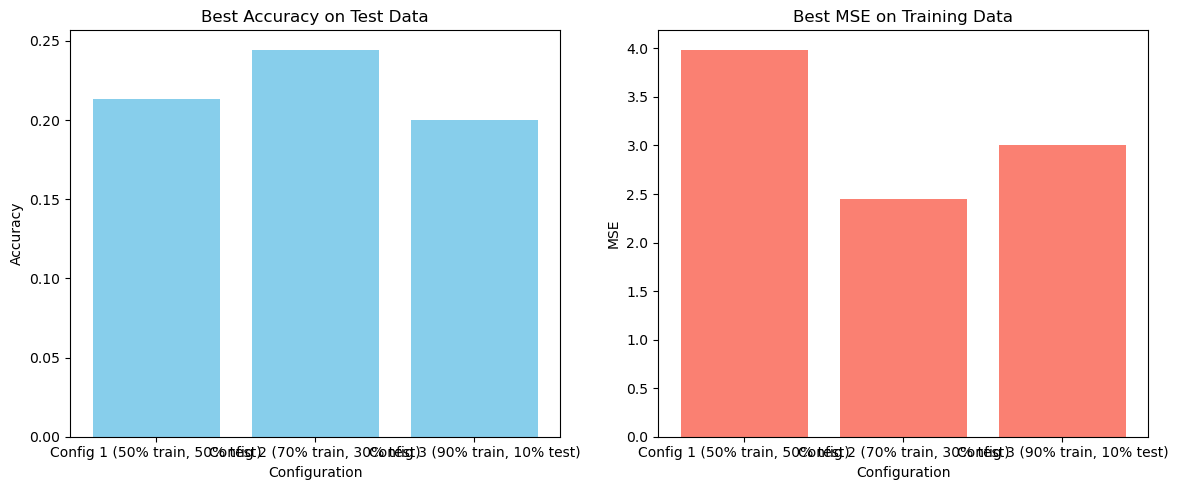

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Misalkan ini adalah dataset Anda
data = pd.DataFrame({
    'Satisfaction': ["Very Dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very Satisfied"] * 30,
    'Recommended': range(150),
    'ValueForMoney': range(150, 300),
    'Food&Beverages': range(300, 450),
    'SeatComfort': range(450, 600),
    'GroundService': range(600, 750),
    'CabinStaffService': range(750, 900),
    'Wifi&Connectivity': range(900, 1050),
    'InflightEntertainment': range(1050, 1200)
})

# Encode target variable
data['Satisfaction'] = data['Satisfaction'].astype('category').cat.codes

# Fitur yang dipilih berdasarkan ANOVA
selected_features = [
    'Recommended', 'ValueForMoney', 'Food&Beverages', 'SeatComfort',
    'GroundService', 'CabinStaffService', 'Wifi&Connectivity', 'InflightEntertainment'
]

X = data[selected_features]
y = data['Satisfaction']

# Konfigurasi proporsi data untuk setiap kelas
configurations = {
    "Config 1 (50% train, 50% test)": 0.5,
    "Config 2 (70% train, 30% test)": 0.7,
    "Config 3 (90% train, 10% test)": 0.9,
}

results = []

# Hyperparameter grid
epochs_list = [50, 100, 150]
learning_rates = [0.001, 0.01, 0.1]
activation_functions = ['relu', 'tanh', 'sigmoid']

for config_name, train_ratio in configurations.items():
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, stratify=y)

    # Normalisasi data
    X_train = (X_train - X_train.mean()) / X_train.std()
    X_test = (X_test - X_test.mean()) / X_test.std()

    for epochs in epochs_list:
        for learning_rate in learning_rates:
            for activation in activation_functions:
                # Bangun model MLP dengan TensorFlow
                model = Sequential([
                    Dense(128, input_dim=X_train.shape[1], activation=activation),
                    Dropout(0.3),
                    Dense(64, activation=activation),
                    Dropout(0.3),
                    Dense(len(np.unique(y)), activation='softmax')
                ])

                # Compile model
                model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                # Train model
                history = model.fit(X_train, y_train, epochs=epochs, batch_size=16, verbose=0, validation_data=(X_test, y_test))

                # Evaluasi model
                y_train_pred = np.argmax(model.predict(X_train), axis=1)
                y_test_pred = np.argmax(model.predict(X_test), axis=1)

                mse_train = mean_squared_error(y_train, y_train_pred)
                acc_test = accuracy_score(y_test, y_test_pred)
                precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

                # Simpan hasil
                results.append({
                    "Configuration": config_name,
                    "Epochs": epochs,
                    "Learning Rate": learning_rate,
                    "Activation": activation,
                    "MSE (Train)": mse_train,
                    "Accuracy (Test)": acc_test,
                    "Precision (Test)": precision,
                    "Recall (Test)": recall,
                    "F1 Score (Test)": f1
                })

# Pilih hasil terbaik untuk setiap konfigurasi dan fungsi aktivasi
best_results = []
for config_name in configurations.keys():
    for activation in activation_functions:
        config_results = [r for r in results if r['Configuration'] == config_name and r['Activation'] == activation]
        if config_results:
            best_result = max(config_results, key=lambda x: x['Accuracy (Test)'])
            best_results.append(best_result)

# Tampilkan hasil terbaik
for result in best_results:
    print(f"Hasil terbaik untuk {result['Configuration']} dengan aktivasi {result['Activation']}:")
    print(f"a) MSE pada data training: {result['MSE (Train)']}")
    print(f"b) Akurasi pada data testing: {result['Accuracy (Test)']}")
    print(f"c) Precision pada data testing: {result['Precision (Test)']}")
    print(f"d) Recall pada data testing: {result['Recall (Test)']}")
    print(f"e) F1 Score pada data testing: {result['F1 Score (Test)']}")
    print(f"f) Hyperparameters terbaik: Epochs={result['Epochs']}, Learning Rate={result['Learning Rate']}, Activation={result['Activation']}\n")

# Visualisasi hasil
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot akurasi
axes[0].bar([f"{r['Configuration']}\n{r['Activation']}" for r in best_results], 
             [r['Accuracy (Test)'] for r in best_results], color='skyblue')
axes[0].set_title('Best Accuracy on Test Data')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Configuration and Activation')
axes[0].tick_params(axis='x', rotation=45)

# Plot MSE
axes[1].bar([f"{r['Configuration']}\n{r['Activation']}" for r in best_results], 
             [r['MSE (Train)'] for r in best_results], color='salmon')
axes[1].set_title('Best MSE on Training Data')
axes[1].set_ylabel('MSE')
axes[1].set_xlabel('Configuration and Activation')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()